# Python Outlier Detection (PyOD)
https://github.com/yzhao062/pyod  
doc https://pyod.readthedocs.io/en/latest/  

## installation
pip install -U pyod

In [15]:
#!pip install -U pyod
!pip freeze | grep pyod

pyod==0.7.4
pyodbc==4.0.26


## API

* `fit(X)`: Fit detector.
* `decision_function(X)`: Predict raw anomaly score of X using the fitted detector.
* `predict(X)`: Predict if a particular sample is an outlier or not using the fitted detector.
* `predict_proba(X)`: Predict the probability of a sample being outlier using the fitted detector.
* `fit_predict(X)`: [Deprecated in V0.6.9] Fit detector first and then predict whether a particular sample is an outlier or not.
* `fit_predict_score(X, y)`: [Deprecated in V0.6.9] Fit the detector, predict on samples, and evaluate the model by predefined metrics, e.g., ROC.
### Key Attributes of a fitted model:

* `decision_scores_`: The outlier scores of the training data. The higher, the more abnormal. Outliers tend to have higher scores.
* `labels_`: The binary labels of the training data. 0 stands for inliers and 1 for outliers/anomalies.

__Note__ : `fit_predict()` and `fit_predict_score()` are deprecated in V0.6.9 due to consistency issue and will be removed in V0.8.0. To get the binary labels of the training data X_train, one should call clf.fit(X_train) and use clf.labels_, instead of calling clf.predict(X_train).

## Implemented Algorithms
PyOD toolkit consists of three major functional groups:

### (i) Individual Detection Algorithms :

#### Linear Model

PCA  
MCD  
OCSVM

#### Proximity-Based

LOF  
COF  
LOCI  
HBOS  
KNN  
AvgKNN  
MedKNN  
SOD  

#### Probabilistic

ABOD  
FastABOD  
SOS  


#### Outlier Ensembles
IForest  
LSCP  
XGBOD  

#### Neural Networks
AutoEncoder  
SO_GAAL  
MO_GAAL

### (ii) Outlier Ensembles & Outlier Detector Combination Frameworks:

Average	Simple combination by averaging the scores  
Weighted Average	Simple combination by averaging the scores with detector weights  
Maximization	Simple combination by taking the maximum scores  
AOM	Average of Maximum  
MOA	Maximization of Average

### (iii) Utility Functions:

Type	Name	Function	Documentation  
Data	generate_data	Synthesized data generation; normal data is generated by a multivariate Gaussian and outliers are generated by a uniform distribution  
Data	generate_data_clusters	Synthesized data generation in clusters; more complex data patterns can be created with multiple clusters	generate_data_clusters
Stat	wpearsonr	Calculate the weighted Pearson correlation of two samples  
Utility	get_label_n	Turn raw outlier scores into binary labels by assign 1 to top n outlier scores  
Utility	precision_n_scores	calculate precision @ rank n  

# examples

## benchmark
https://github.com/yzhao062/pyod/blob/master/notebooks/benchmark.py

## knn_example(有监督)
图中绿色圆要被分类到哪一类(蓝色方形？红色三角?)

取离绿色圆最近的K个样本，哪类样本所占的比例多，就分到哪一类。

当K=3的时候，红色三角形所占比例为2/3，绿色圆将被分类到红色三角形类。

当K=5的时候，蓝色方形所占比例为3/5，绿色圆将被分类到蓝色方形类。

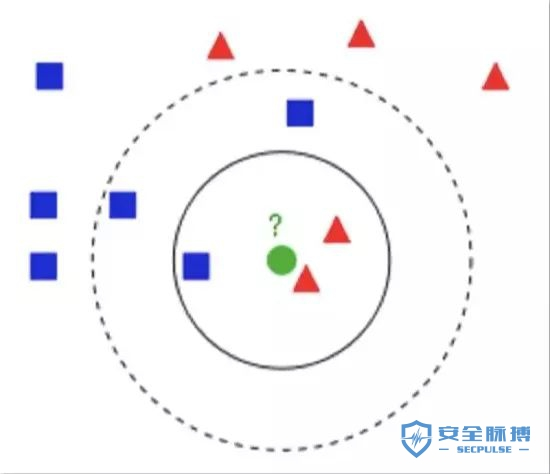

In [1]:
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [6]:
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

### Generate sample data

In [2]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=14)

In [4]:
X_train[:5]

array([[8.13468655, 7.94399956],
       [6.44831823, 8.11200451],
       [6.83784772, 8.16343356],
       [7.56785715, 8.8396045 ],
       [7.85578147, 8.01135032]])

In [5]:
y_train[:5]

array([0., 0., 0., 0., 0.])

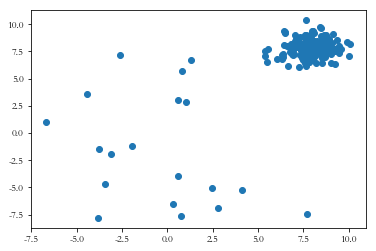

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1])

### train kNN detector

In [9]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [10]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9986, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


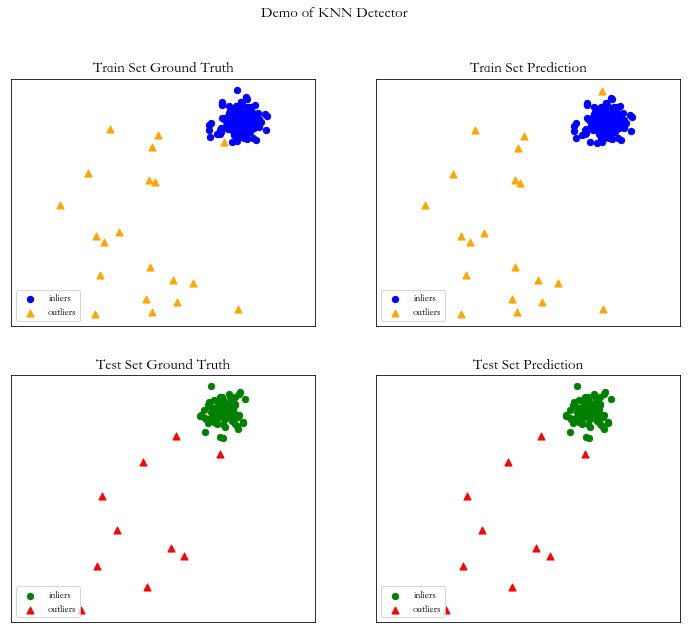

In [11]:
# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)

## iforest_example

In [12]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)



On Training Data:
IForest ROC:0.9944, precision @ rank n:0.9

On Test Data:
IForest ROC:0.9989, precision @ rank n:0.9


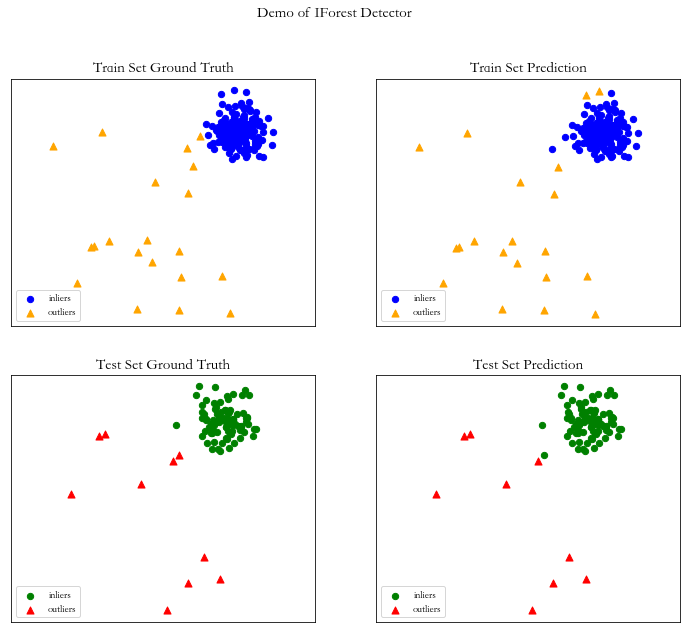

In [13]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)

# train IForest detector
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

## auto_encoder_example

In [34]:
!pip freeze | grep Keras

Keras==2.2.4
Keras-Applications==1.0.7
Keras-Preprocessing==1.0.9


In [36]:
!pip freeze | grep tensorflow

tensorflow==1.14.0
tensorflow-estimator==1.14.0


In [35]:
!pip freeze | grep pyod

pyod==0.7.4
pyodbc==4.0.26


In [31]:
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

In [3]:
contamination = 0.1  # percentage of outliers
n_train = 20000  # number of training points
n_test = 2000  # number of testing points
n_features = 300  # number of features

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [4]:
# train AutoEncoder detector
clf_name = 'AutoEncoder'
clf = AutoEncoder(epochs=30, contamination=contamination)
clf.fit(X_train)

W0813 15:46:39.791227 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 15:46:39.811166 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 15:46:39.815474 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 15:46:39.838287 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                19264     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
__________

W0813 15:46:40.529532 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 3s 156us/step - loss: 97.7132 - val_loss: 20.7556
Epoch 2/30
18000/18000 [==============================] - 2s 104us/step - loss: 12.1207 - val_loss: 8.0869
Epoch 3/30
18000/18000 [==============================] - 2s 101us/step - loss: 6.2613 - val_loss: 5.4155
Epoch 4/30
18000/18000 [==============================] - 2s 119us/step - loss: 4.6271 - val_loss: 4.2649
Epoch 5/30
18000/18000 [==============================] - 2s 108us/step - loss: 3.8002 - val_loss: 3.5776
Epoch 6/30
18000/18000 [==============================] - 2s 98us/step - loss: 3.2664 - val_loss: 3.1159
Epoch 7/30
18000/18000 [==============================] - 2s 108us/step - loss: 2.8735 - val_loss: 2.7880
Epoch 8/30
18000/18000 [==============================] - 2s 110us/step - loss: 2.5761 - val_loss: 2.5068
Epoch 9/30
18000/18000 [==============================] - 2s 104us/step - loss: 2.3314 - val_loss: 2.

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=30,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x12c657f28>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

In [6]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [7]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [8]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0

On Test Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0


In [12]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1800
         1.0       1.00      1.00      1.00       200

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [11]:
y_test_pred

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
y_test_scores

array([ 7.89626583,  7.47674153,  7.69570731, ..., 49.42823708,
       50.04617787, 47.32094283])

## Quick Start for Combining Outlier Scores from Various Base Detectors
Outlier detection often suffers from model instability due to its unsupervised nature. Thus, it is recommended to combine various detector outputs, e.g., by averaging, to improve its robustness. Detector combination is a subfield of outlier ensembles; refer [3] for more information.

### Four score combination mechanisms are shown in this demo:

* Average: average scores of all detectors.
* maximization: maximum score across all detectors.
* Average of Maximum (AOM): divide base detectors into subgroups and take the maximum score for each subgroup. The final score is the average of all subgroup scores.
* Maximum of Average (MOA): divide base detectors into subgroups and take the average score for each subgroup. The final score is the maximum of all subgroup scores.

### 步骤
1. First initialize 20 kNN outlier detectors with different k (10 to 200), and get the outlier scores.

1. Then the output scores are standardized into zero mean and unit variance before combination. This step is crucial to adjust the detector outputs to the same scale.

1. Then four different combination algorithms are applied as described above.

1. Finally, all four combination methods are evaluated with ROC and Precision @ Rank n.

In [30]:
import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.knn import KNN
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

if __name__ == "__main__":

    # Define data file and read X and y
    # Generate some data if the source data is missing
    mat_file = 'cardio.mat'
    try:
        mat = loadmat(os.path.join('data', mat_file))

    except TypeError:
        print('{data_file} does not exist. Use generated data'.format(
            data_file=mat_file))
        X, y = generate_data(train_only=True)  # load data
    except IOError:
        print('{data_file} does not exist. Use generated data'.format(
            data_file=mat_file))
        X, y = generate_data(train_only=True)  # load data
    else:
        X = mat['X']
        y = mat['y'].ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)

    n_clf = 20  # number of base detectors

    # Initialize 20 base detectors for combination
    k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
              150, 160, 170, 180, 190, 200]

    train_scores = np.zeros([X_train.shape[0], n_clf])
    test_scores = np.zeros([X_test.shape[0], n_clf])

    print('Combining {n_clf} kNN detectors'.format(n_clf=n_clf))

    for i in range(n_clf):
        k = k_list[i]

        clf = KNN(n_neighbors=k, method='largest')
        clf.fit(X_train_norm)

        train_scores[:, i] = clf.decision_scores_
        test_scores[:, i] = clf.decision_function(X_test_norm)

    # Decision scores have to be normalized before combination
    train_scores_norm, test_scores_norm = standardizer(train_scores,
                                                       test_scores)
    # Combination by average
    y_by_average = average(test_scores_norm)
    evaluate_print('Combination by Average', y_test, y_by_average)

    # Combination by max
    y_by_maximization = maximization(test_scores_norm)
    evaluate_print('Combination by Maximization', y_test, y_by_maximization)

    # Combination by aom
    y_by_aom = aom(test_scores_norm, n_buckets=5)
    evaluate_print('Combination by AOM', y_test, y_by_aom)

    # Combination by moa
    y_by_moa = moa(test_scores_norm, n_buckets=5)
    evaluate_print('Combination by MOA', y_test, y_by_moa)

Combining 20 kNN detectors
Combination by Average ROC:0.9236, precision @ rank n:0.5526
Combination by Maximization ROC:0.9215, precision @ rank n:0.5921
Combination by AOM ROC:0.9268, precision @ rank n:0.5921
Combination by MOA ROC:0.9289, precision @ rank n:0.6053
